In [44]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [45]:
# Reference:
# https://stackoverflow.com/questions/44047819/increase-image-brightness-without-overflow/44054699#44054699

In [46]:
def load(path, display=True):
    img_crowd = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    if display:
        plt.figure(figsize = [10, 10])
        plt.axis('off')
        plt.imshow(img_crowd, cmap='gray')

    return img_crowd

[[150 148 151 ... 147 152 152]
 [150 149 149 ... 145 149 151]
 [156 164 149 ... 149 151 147]
 ...
 [149 151 154 ... 141 142 133]
 [153 155 157 ... 139 131 130]
 [148 150 152 ... 135 126 133]]


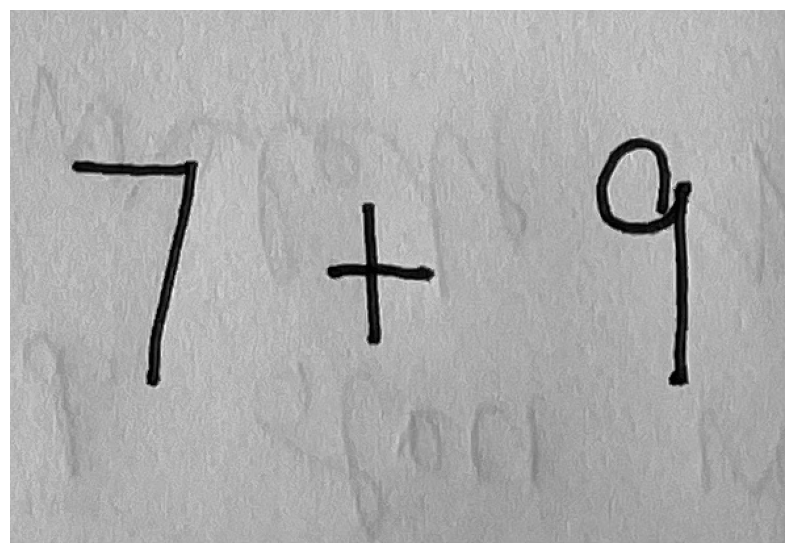

In [47]:
img = load('../equation-dataset/06_eq.png')
print(img)

In [48]:
def remove_shadows(img):
    # Generate the shadow of the image
    # Create a 9x9 kernel, can also use np.ones()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 9))

    # Some morphology operators
    # https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html 
    # https://docs.opencv.org/3.4/d3/dbe/tutorial_opening_closing_hats.html
    shadow = cv2.dilate(img, kernel) # Make the background bleed into the text to cover it up

    # Filtering
    # https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html
    shadow = cv2.medianBlur(shadow, 21) # Use a median filter to cover up the text entirely (there may still be particles in the text), now we have an image with only the shadow

    res = 255 - cv2.absdiff(img, shadow) # Remove the shadow from the original image
    return res

# Results

In [49]:
def adaptive_clean(img_path, load=True, mode='otsu'):
    # Load image
    if load:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE).astype(np.uint8)
    else:
        img = img_path

    # Convert to grayscale and apply Otsu's binarization for noise reduction
    # https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html
    img = cv2.GaussianBlur(img,(5,5),0)
    if mode == 'otsu':
        _, img = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    # or you can use gaussian/mean adaptive thresholding
    elif mode == 'mean':
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
    elif mode == 'gaussian':
        img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    img = 255 - img

    # Can also apply some morphological transformations
    # https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
    kernel = np.ones((3, 3), dtype=np.uint8) # or you can use cv2.getStructuringElement()
    img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    return img


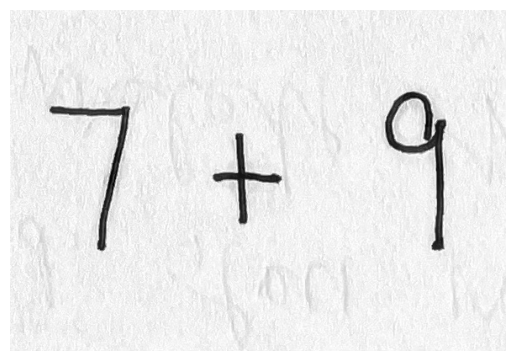

In [50]:
img = remove_shadows(img)
plt.axis('off')
plt.imshow(img, cmap='gray')

# Effects of Histogram Equalization after removing shadows

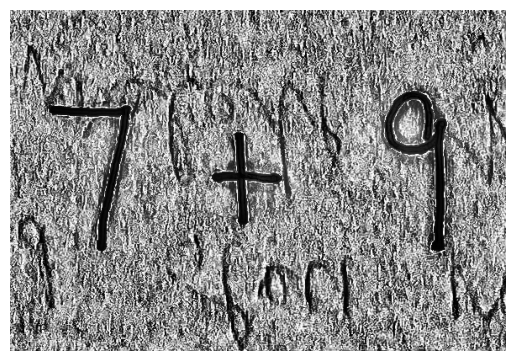

In [51]:
# Enhances background features
img = remove_shadows(img)
clahe = cv2.createCLAHE(clipLimit=25.0, tileGridSize=(7,7))
img = clahe.apply(img)
plt.axis('off')
plt.imshow(img, cmap='gray')

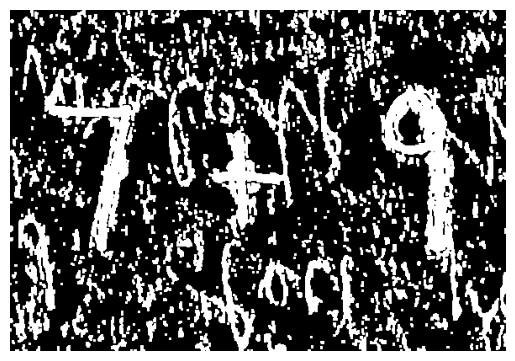

In [52]:
img = adaptive_clean(img, load=False ,mode='otsu') # Bad threshold!
plt.axis('off')
plt.imshow(img, cmap='gray')

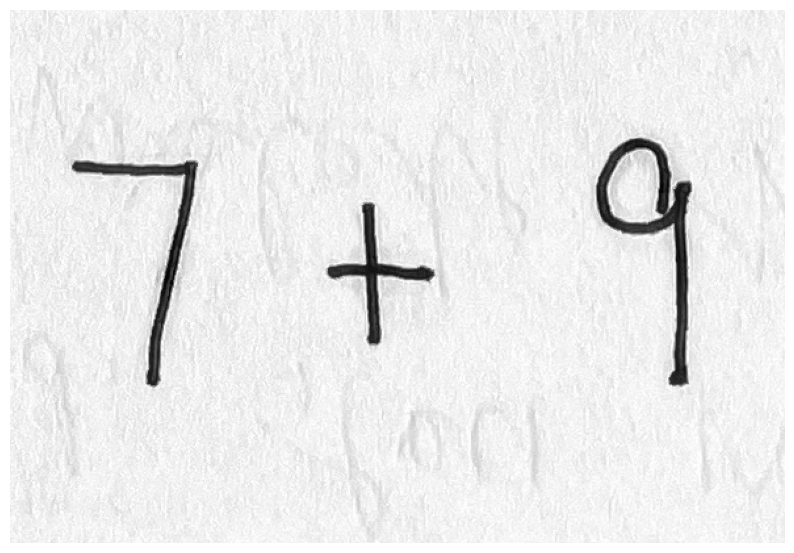

In [53]:
# For sanity, here are the intermediate steps without histogram equallization:
img = load('../equation-dataset/06_eq.png')
img = remove_shadows(img)
plt.axis('off')
plt.imshow(img, cmap='gray')

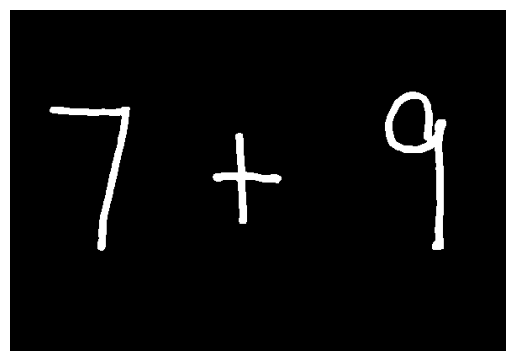

In [54]:
img = adaptive_clean(img, load=False ,mode='otsu') # Bad threshold!
plt.axis('off')
plt.imshow(img, cmap='gray')

# Thresholding

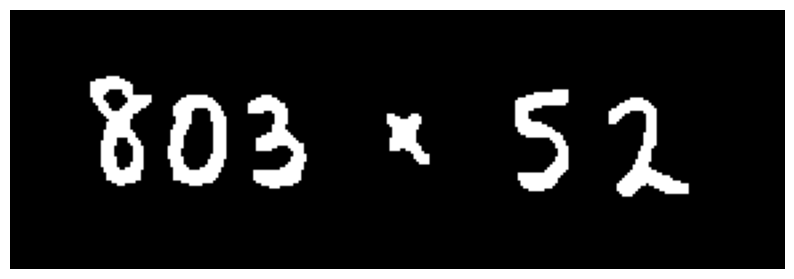

In [55]:
img = load('../equation-dataset/dark-background/6.png')
img = remove_shadows(img)
img = adaptive_clean(img, load=False ,mode='otsu') 
plt.axis('off')
plt.imshow(img, cmap='gray')